In [ ]:
from google.colab import files

# Upload a single file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'File {filename} uploaded')


Saving normal (20).png to normal (20).png
File normal (20).png uploaded


In [ ]:
# Get the file path of the uploaded image
uploaded_file_path = list(uploaded.keys())[0]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already uploaded the image and obtained its path
uploaded_file_path = list(uploaded.keys())[0]

# Load the image
image = cv2.imread(uploaded_file_path, cv2.IMREAD_GRAYSCALE)

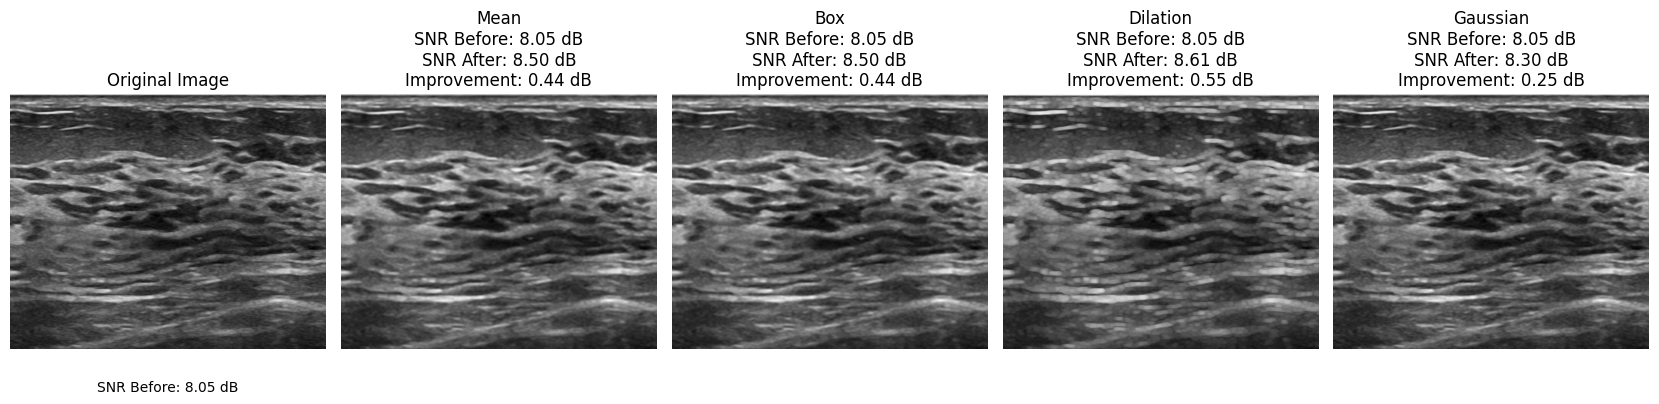

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(original, noisy):
    signal = np.mean(original)
    noise = np.std(original - noisy)
    snr = 20 * np.log10(signal / noise)
    return snr

# Display the original image
plt.figure(figsize=(20, 5))
plt.subplot(1, 6, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Calculate SNR before filtering
snr_before = calculate_snr(image, np.zeros_like(image))
plt.text(0.5, -0.15, f'SNR Before: {snr_before:.2f} dB', ha='center', va='center', transform=plt.gca().transAxes)

# Apply Mean Filter
mean_filtered_image = cv2.blur(image, (5, 5))
snr_before_mean = calculate_snr(image, np.zeros_like(image))
snr_after_mean = calculate_snr(mean_filtered_image, np.zeros_like(mean_filtered_image))
snr_improvement_mean = snr_after_mean - snr_before_mean
plt.subplot(1, 6, 2)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title(f'Mean\nSNR Before: {snr_before_mean:.2f} dB\nSNR After: {snr_after_mean:.2f} dB\nImprovement: {snr_improvement_mean:.2f} dB')
plt.axis('off')

# Apply Box Filter
box_filtered_image = cv2.boxFilter(image, -1, (5, 5))
snr_before_box = calculate_snr(image, np.zeros_like(image))
snr_after_box = calculate_snr(box_filtered_image, np.zeros_like(box_filtered_image))
snr_improvement_box = snr_after_box - snr_before_box
plt.subplot(1, 6, 3)
plt.imshow(box_filtered_image, cmap='gray')
plt.title(f'Box\nSNR Before: {snr_before_box:.2f} dB\nSNR After: {snr_after_box:.2f} dB\nImprovement: {snr_improvement_box:.2f} dB')
plt.axis('off')

# Apply Dilation
kernel = np.ones((5, 5), np.uint8)
dilation_image = cv2.dilate(image, kernel, iterations=1)
snr_before_dilation = calculate_snr(image, np.zeros_like(image))
snr_after_dilation = calculate_snr(dilation_image, np.zeros_like(dilation_image))
snr_improvement_dilation = snr_after_dilation - snr_before_dilation
plt.subplot(1, 6, 4)
plt.imshow(dilation_image, cmap='gray')
plt.title(f'Dilation\nSNR Before: {snr_before_dilation:.2f} dB\nSNR After: {snr_after_dilation:.2f} dB\nImprovement: {snr_improvement_dilation:.2f} dB')
plt.axis('off')

# Apply Gaussian Filter
gaussian_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
snr_before_gaussian = calculate_snr(image, np.zeros_like(image))
snr_after_gaussian = calculate_snr(gaussian_filtered_image, np.zeros_like(gaussian_filtered_image))
snr_improvement_gaussian = snr_after_gaussian - snr_before_gaussian
plt.subplot(1, 6, 5)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title(f'Gaussian\nSNR Before: {snr_before_gaussian:.2f} dB\nSNR After: {snr_after_gaussian:.2f} dB\nImprovement: {snr_improvement_gaussian:.2f} dB')
plt.axis('off')


plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
import cv2
import numpy as np
# Load the image
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None or image.size == 0:
    print("Error: Image not loaded correctly")
    exit()

In [ ]:
!pip install mahotas



In [ ]:
import cv2
import numpy as np
import mahotas.features
from scipy.stats import skew, kurtosis

# Preprocess the image
image = cv2.GaussianBlur(image, (5, 5), 0)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Extract texture features using Haralick features from mahotas
haralick_features = mahotas.features.haralick(image).mean(axis=0)
texture_features = haralick_features.flatten()

# Extract shape features using moments
moments = cv2.moments(image)
shape_features = [
    moments['m00'],  # Area
    moments['m10'],  # x-coordinate of the centroid
    moments['m01'],  # y-coordinate of the centroid
    2 * moments['m11'] - moments['m02'],  # Eccentricity
    moments['m02'] / (moments['m00'] + 1e-5),  # Compactness
]

# Extract intensity-based features
intensity_features = [
    np.mean(image),
    np.var(image),
    skew(image.flatten()),  # Corrected
    kurtosis(image.flatten()),  # Corrected
]

# Combine all features into a single feature vector
feature_vector = np.concatenate((texture_features, shape_features, intensity_features))



In [ ]:
import cv2
import numpy as np

# Assuming 'image' is already loaded
# If the image is not grayscale, you can convert it to grayscale using cv2.cvtColor
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract shape features using moments
moments = cv2.moments(image)

# Check if moments are calculated correctly
print("Moments:", moments)

# Check if the denominator ('m00') is close to zero
if moments['m00'] < 1e-5:
    print("Warning: 'm00' is close to zero. Adding a small epsilon for normalization.")
    moments['m00'] += 1e-5

# Normalize moments
shape_features = [
    moments['m00'],  # Area
    moments['m10'],  # x-coordinate of the centroid
    moments['m01'],  # y-coordinate of the centroid
    2 * moments['m11'] - moments['m02'],  # Eccentricity
    moments['m02'] / moments['m00'],  # Compactness
]



Moments: {'m00': 51820649.0, 'm10': 21797838689.0, 'm01': 17264262370.0, 'm20': 12373610220555.0, 'm11': 7263475997594.0, 'm02': 7664621956160.0, 'm30': 7947076707941507.0, 'm21': 4102511921198300.0, 'm12': 3231296598579080.0, 'm03': 3839282439044926.0, 'mu20': 3204566978513.295, 'mu11': 1436376557.3581274, 'mu02': 1912961933912.9224, 'mu30': 46302873177734.22, 'mu21': -21015615493936.06, 'mu12': 6292817247819.214, 'mu03': 11159833328439.553, 'nu20': 0.0011933385148207986, 'nu11': 5.348877021994339e-07, 'nu02': 0.0007123618162549504, 'nu30': 2.3952498474967493e-06, 'nu21': -1.0871387961969206e-06, 'nu12': 3.255277376698951e-07, 'nu03': 5.772987126614852e-07}


In [ ]:
# Print the extracted features
print("Haralick Texture Features:")
print(texture_features)

print("\nShape Features:")
print(shape_features)


# Print individual features
print("Mean:", mean_value)
print("Variance:", variance_value)
print("Skewness:", skewness_value)
print("Kurtosis:", kurtosis_value)


print("\nIntensity Features:")
print(intensity_features)

print("\nCombined Feature Vector:")
print(feature_vector)

Haralick Texture Features:
[ 8.16403628e-04  5.62976661e+01  9.84043892e-01  1.76713792e+03
  2.68331141e-01  1.77149408e+02  7.01225400e+03  8.28965389e+00
  1.11193239e+01  4.28299444e-04  3.65440410e+00 -4.12031027e-01
  9.97383842e-01]

Shape Features:
[51820649.0, 21797838689.0, 17264262370.0, 6862330039028.0, 147906.71487267557]
Mean: 88.61732493838056
Variance: 1229.4461924906636
Skewness: 0.8493226405136671
Kurtosis: 0.482576518734418

Intensity Features:
[88.63730656800716, 1777.5635394850253, 0.7799634414914082, 0.1845012042700911]

Combined Feature Vector:
[ 8.16403628e-04  5.62976661e+01  9.84043892e-01  1.76713792e+03
  2.68331141e-01  1.77149408e+02  7.01225400e+03  8.28965389e+00
  1.11193239e+01  4.28299444e-04  3.65440410e+00 -4.12031027e-01
  9.97383842e-01  5.18206490e+07  2.17978387e+10  1.72642624e+10
  6.86233004e+12  1.47906715e+05  8.86373066e+01  1.77756354e+03
  7.79963441e-01  1.84501204e-01]


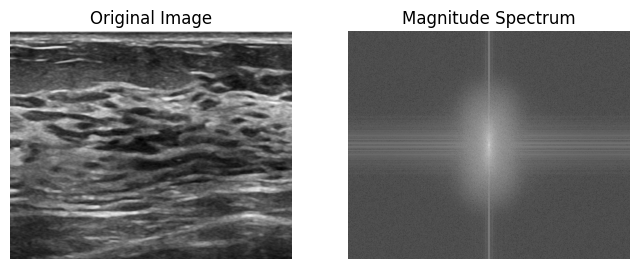

Frequency Domain Features:
Mean: 3756.5239304842844
Variance: 5618360694.959699
Skewness: 568.7145474458032
Kurtosis: 390775.5186108491


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Assuming 'image' is already loaded

# If the image is not grayscale, you can convert it to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Fourier Transform
fourier_transform = np.fft.fft2(image)

# Shift the zero frequency component to the center
shifted_transform = np.fft.fftshift(fourier_transform)

# Compute Magnitude Spectrum
magnitude_spectrum = np.abs(shifted_transform)

# Visualize the Magnitude Spectrum
plt.figure(figsize=(8, 8))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

# Extract frequency domain features
spectrum_mean = np.mean(magnitude_spectrum)
spectrum_variance = np.var(magnitude_spectrum)
spectrum_skewness = scipy.stats.skew(magnitude_spectrum.flatten())
spectrum_kurtosis = scipy.stats.kurtosis(magnitude_spectrum.flatten())

# Print the extracted features
print("Frequency Domain Features:")
print("Mean:", spectrum_mean)
print("Variance:", spectrum_variance)
print("Skewness:", spectrum_skewness)
print("Kurtosis:", spectrum_kurtosis)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image  # Import PIL to resize images
import shutil

import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import random
from sklearn.model_selection import train_test_split

import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, ColorJitter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Specify the path to your dataset
dataset_path = "/content/drive/MyDrive/Dataset_BUSI_with_GT"

# Check if the specified path exists
if os.path.exists(dataset_path):
    data_dir = dataset_path
    print("Dataset path:", data_dir)
else:
    print("The specified path does not exist. Please check the path.")


Dataset path: /content/drive/MyDrive/Dataset_BUSI_with_GT


<ipython-input-5-40923bb0477b>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


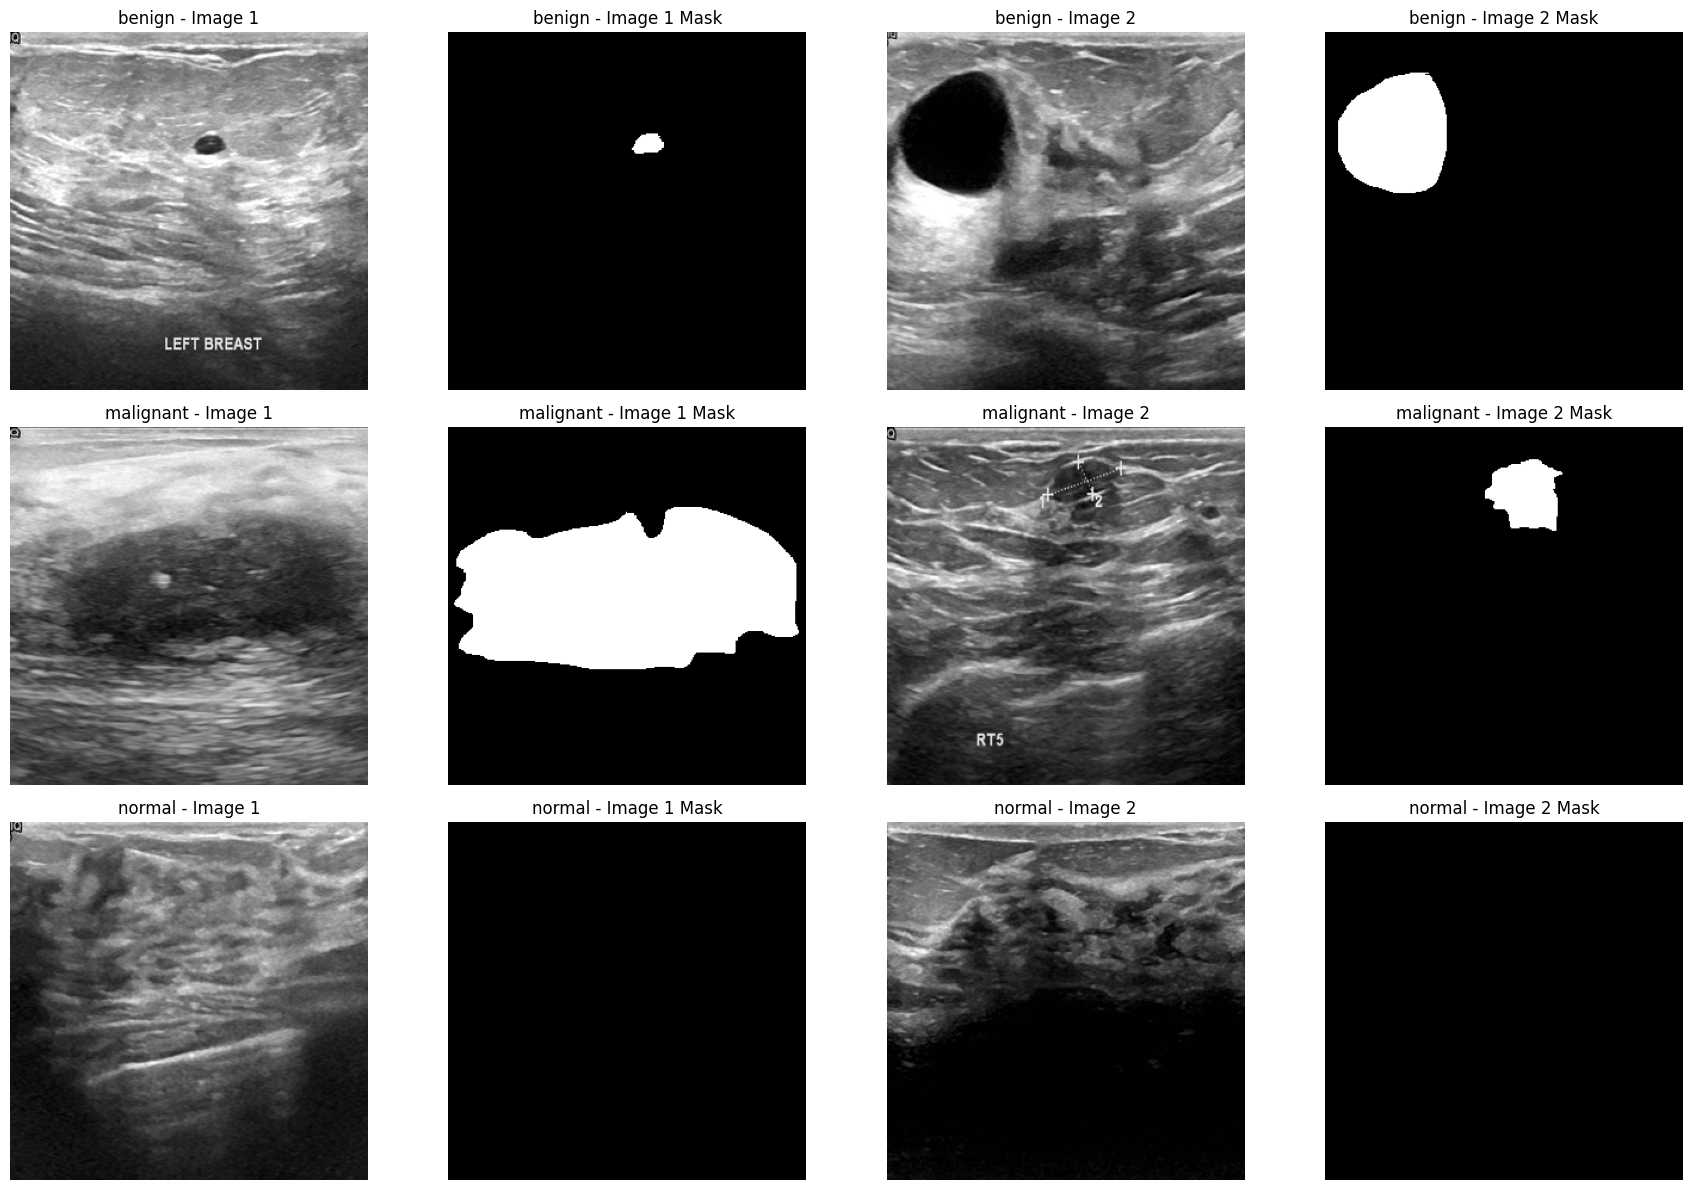

In [ ]:
# Define the labels and corresponding directories
labels = ['benign', 'malignant', 'normal']


# Create a figure to display the images
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Desired width and height for each image
desired_width = 300  # Adjust as needed
desired_height = 300  # Adjust as needed

for i, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)

    # Get a list of image files
    image_files = [file for file in os.listdir(label_dir) if file.endswith('.png')]

    # Sort the list of image files
    image_files = sorted(image_files)

    # Loop through the first 4 image files
    for j in range(4):
        if j < len(image_files):
            # Load and resize the image
            image_path = os.path.join(label_dir, image_files[j])
            image = Image.open(image_path)
            image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            # Determine the label based on whether it's an image or a mask
            if j % 2 == 0:
                image_label = f'{label} - Image {j // 2 + 1}'
            else:
                image_label = f'{label} - Image {j // 2 + 1} Mask'

            # Display the image with the corresponding label
            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define the minority classes in your dataset
class_names = ['malignant', 'normal','benign']
minority_classes = ['malignant', 'normal']

# Define custom data transformations for minority classes
minority_class_transforms = transforms.Compose([
    RandomHorizontalFlip(p=0.9),  # Apply with 90% probability
    RandomRotation(15, expand=False, center=None),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

# Define data transformations for train, validation, and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        # Apply custom augmentations to minority classes
        transforms.RandomApply([minority_class_transforms], p=0.5) if any(cls in minority_classes for cls in class_names) else transforms.RandomApply([], p=0.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# Define the training function with early stopping and additional features
def train_model_with_early_stopping(model, lossFunction, optimizer, scheduler, dataloaders, dataset_sizes, class_names, device, num_epochs=20, patience=2):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')  # Initialize best_loss with a large value
    consecutive_epochs_without_improvement = 0

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = lossFunction(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Append training loss here
                if phase == 'train':
                    train_losses.append(loss.item())  # Append training loss
                else:
                    val_losses.append(loss.item())  # Append validation loss

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Early stopping: Check if validation loss improved
            if phase == 'validation':
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    consecutive_epochs_without_improvement = 0
                else:
                    consecutive_epochs_without_improvement += 1


                val_losses.append(epoch_loss)

        # Check if early stopping criteria are met
        if consecutive_epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch} epochs")
            break

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Loss: {:.4f}'.format(best_loss))

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Calculate classification report and confusion matrix for validation data
    y_true = []
    y_pred = []

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for inputs, labels in dataloaders['validation']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Generate classification report
    target_names = [str(class_names[i]) for i in range(len(class_names))]
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return model

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

import warnings

# Suppress DeprecationWarning and ResourceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

# Set the path to the input folder containing images and masks
input_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'

# Set the path to the output folder where overlayed images will be saved
output_dir = '/content/OverlayedImages'

# Create subdirectories for each label
labels = ['benign', 'malignant', 'normal']
for label in labels:
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# Function to overlay images and masks, resize if needed, and save the result
def overlay_and_save(image_path, mask_path, output_path):
    try:
        # Check if both image and mask files exist
        if os.path.exists(image_path) and os.path.exists(mask_path):
            # Open the actual image and mask image
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Ensure both images have the same color mode
            if image.mode != mask.mode:
                mask = mask.convert(image.mode)

            # Resize the images if their sizes don't match
            if image.size != mask.size:
                image = image.resize(mask.size)

            # Overlay the image with the mask
            overlayed = Image.blend(image, mask, alpha=0.5)

            # Save the overlayed image to the appropriate label folder
            label = os.path.basename(os.path.dirname(image_path))
            output_path = os.path.join(output_dir, label, os.path.basename(image_path))
            overlayed.save(output_path)
        else:
            #print(f"File not found for: {image_path} or {mask_path}. Skipping...")
            pass
    except Exception as e:
        print(f"An error occurred for: {image_path} or {mask_path}. Error: {str(e)}")

# Iterate through the subdirectories (benign, malignant, normal)
for label in labels:
    label_dir = os.path.join(input_dir, label)
    if os.path.isdir(label_dir):
        for image_filename in os.listdir(label_dir):
            if image_filename.endswith('.png'):
                image_path = os.path.join(label_dir, image_filename)
                # Construct the mask file path based on the naming convention
                mask_filename = image_filename.replace('.png', '_mask.png')
                mask_path = os.path.join(label_dir, mask_filename)
                overlay_and_save(image_path, mask_path, output_dir)

print("Overlayed images have been saved to /kaggle/working/OverlayedImages directory.")

Overlayed images have been saved to /kaggle/working/OverlayedImages directory.


In [ ]:
import os

# Function to count the number of files in a directory
def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

# Set the paths to the input and output directories
# Set the paths to the input and output directories
input_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'
output_dir = '/content/OverlayedImages'
# Count the files in the input and output directories
input_counts = {}
output_counts = {}

# Count files in input directory
for label in os.listdir(input_dir):
    label_dir = os.path.join(input_dir, label)
    if os.path.isdir(label_dir):
        input_counts[label] = count_files_in_directory(label_dir)

# Count files in output directory
for label in os.listdir(output_dir):
    label_dir = os.path.join(output_dir, label)
    if os.path.isdir(label_dir):
        output_counts[label] = count_files_in_directory(label_dir)

# Print file counts
print("File Counts Before Overlay-includes masks:")
for label, count in input_counts.items():
    print(f"{label}: {count} files")

print("\nFile Counts After Overlay:")
for label, count in output_counts.items():
    print(f"{label}: {count} files")

File Counts Before Overlay-includes masks:
normal: 266 files
malignant: 421 files
benign: 891 files

File Counts After Overlay:
malignant: 210 files
benign: 437 files
normal: 133 files


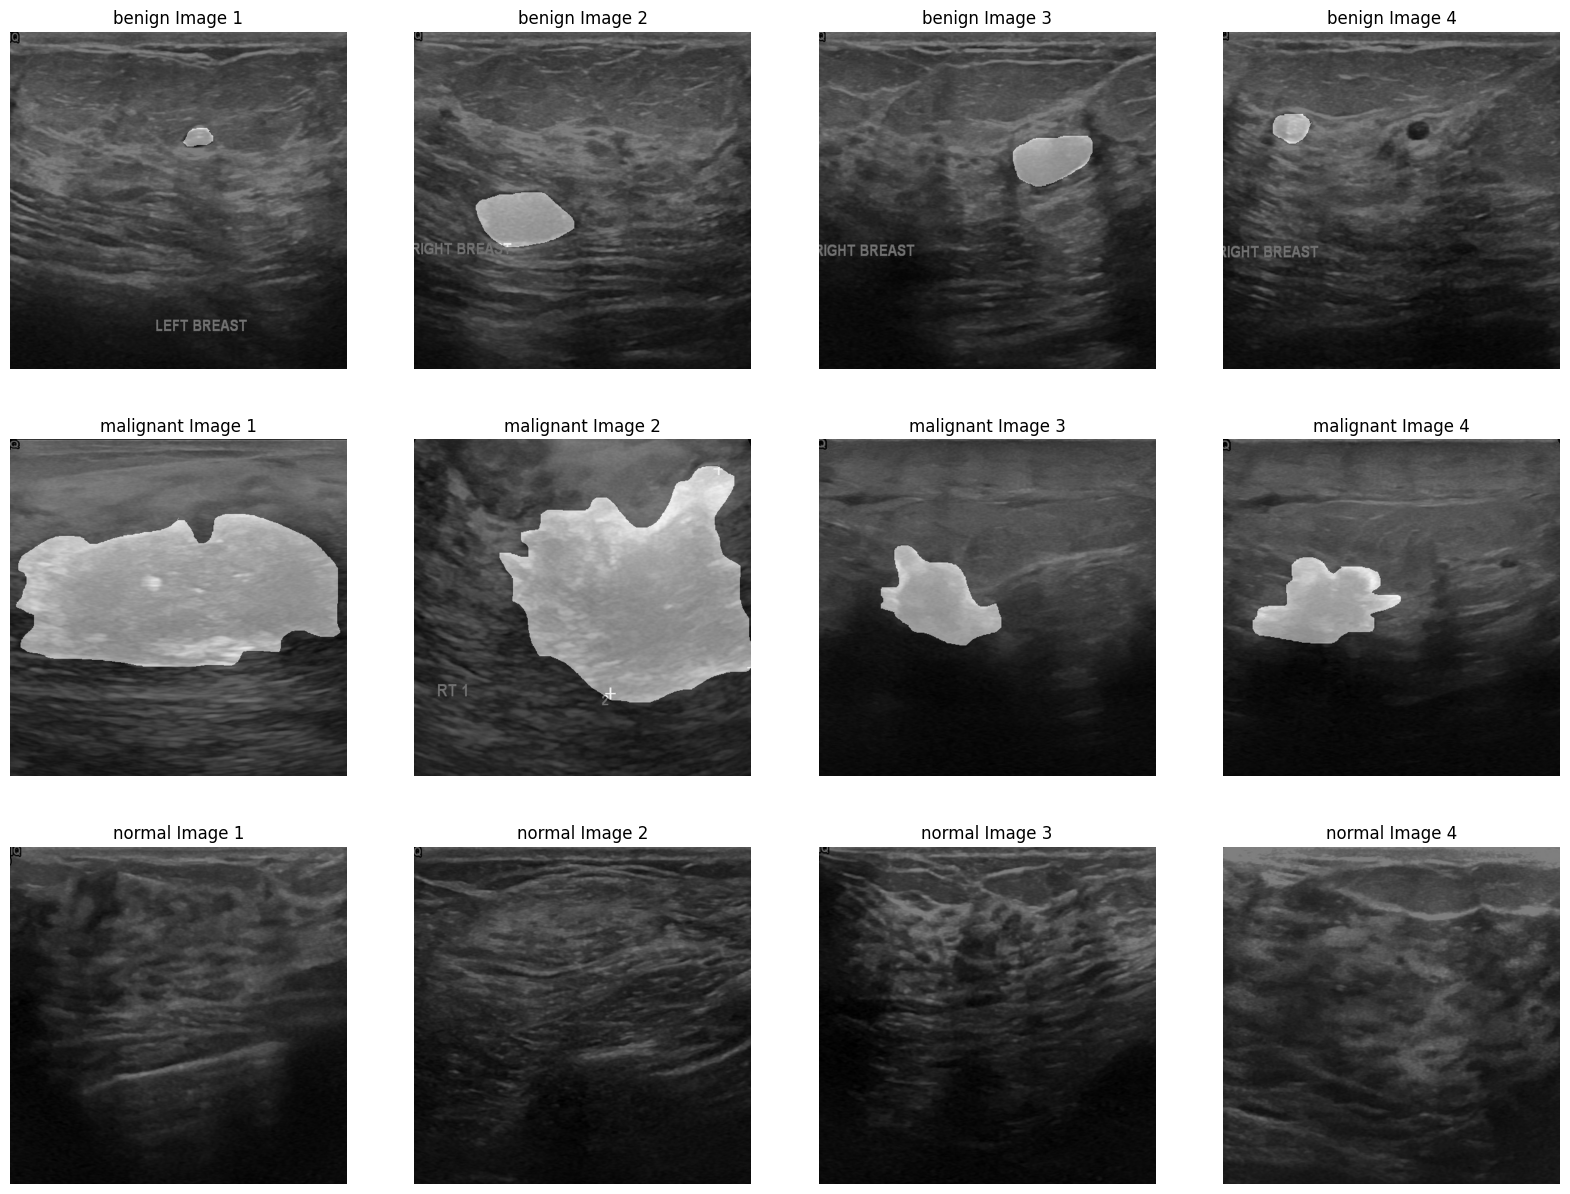

In [ ]:


# Set the path to the overlayed images directory
overlayed_dir = '/content/OverlayedImages'

# Create subdirectories for each label
labels = ['benign', 'malignant', 'normal']
label_dirs = [os.path.join(overlayed_dir, label) for label in labels]

# Create a figure to display the images
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Desired width and height for each image
desired_width = 800  # Adjust as needed
desired_height = 800  # Adjust as needed

# Loop through each label and display the first 4 images
for i, label_dir in enumerate(label_dirs):
    # Get a list of image files and sort them
    images = [image for image in os.listdir(label_dir) if image.endswith('.png')]
    images.sort(key=lambda x: int(x.split('(')[1].split(')')[0]))  # Sort the images by number in parentheses

    for j, image_filename in enumerate(images[:4]):  # Display the first 4 images
        image_path = os.path.join(label_dir, image_filename)
        image = Image.open(image_path)

        # Resize the image to the desired width and height
        image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

        # Display the image in the subplot
        axs[i, j].imshow(image)
        axs[i, j].set_title(f'{labels[i]} Image {j + 1}')
        axs[i, j].axis('off')

plt.show()

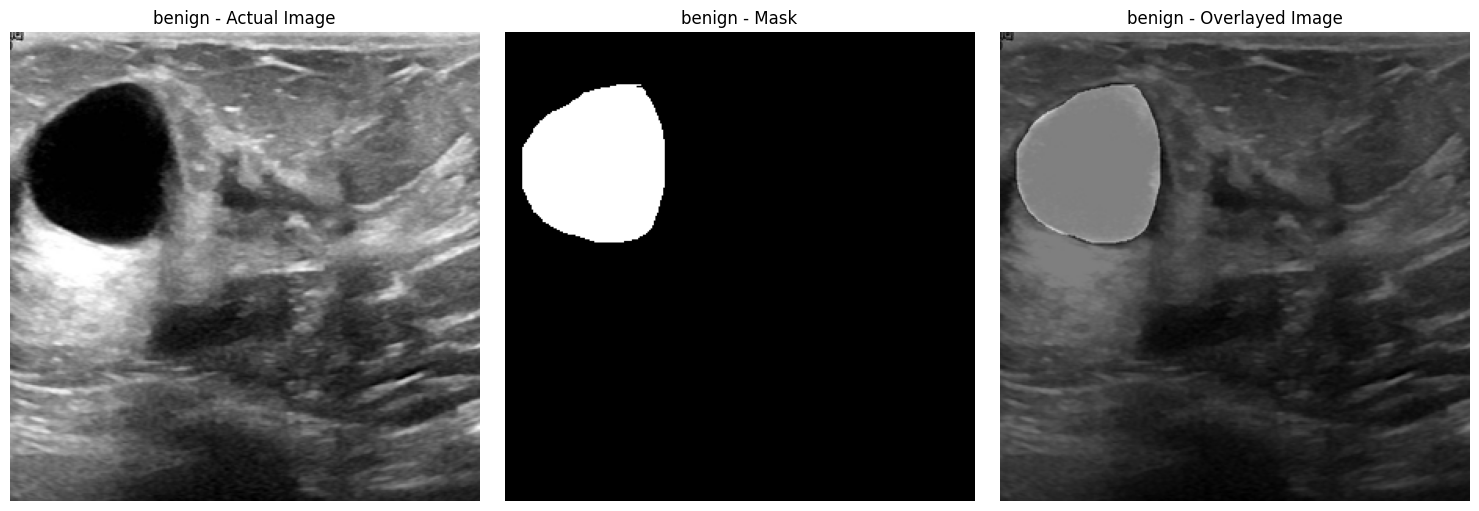

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory paths
input_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'  # Update the path based on your Colab environment
overlayed_dir = '/content/OverlayedImages/benign'  # Update the path based on your Colab environment

# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for display
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'benign (10).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'benign', image_filename)
mask_image_path = os.path.join(input_dir, 'benign', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)

# Check if the overlayed image exists before attempting to load it
if os.path.exists(overlayed_image_path):
    overlayed_image = Image.open(overlayed_image_path)

    # Resize the images
    overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.ANTIALIAS)

    # Display the overlayed image
    axs[2].imshow(overlayed_image)
    axs[2].set_title('benign - Overlayed Image')
    axs[2].axis('off')
else:
    axs[2].axis('off')
    axs[2].text(0.5, 0.5, 'Overlayed image not found', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Resize the actual image and mask
actual_image = actual_image.resize((desired_width, desired_height), Image.ANTIALIAS)
mask_image = mask_image.resize((desired_width, desired_height), Image.ANTIALIAS)

# Display the actual and mask images
axs[0].imshow(actual_image)
axs[0].set_title('benign - Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('benign - Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()


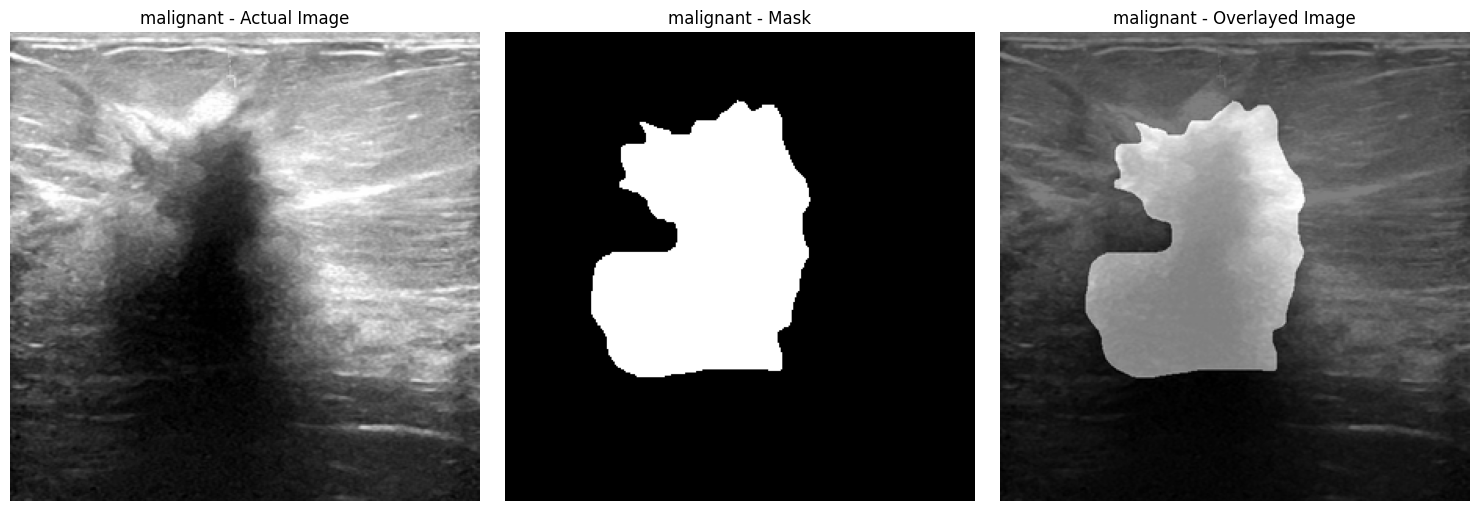

In [ ]:
# Define the directory paths
input_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'  # Update the path based on your Colab environment
overlayed_dir = '/content/OverlayedImages/malignant'  # Update the path based on your Colab environment

# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for display
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'malignant (103).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'malignant', image_filename)
mask_image_path = os.path.join(input_dir, 'malignant', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)

# Check if the overlayed image exists before attempting to load it
if os.path.exists(overlayed_image_path):
    overlayed_image = Image.open(overlayed_image_path)

    # Resize the images
    overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.ANTIALIAS)

    # Display the overlayed image
    axs[2].imshow(overlayed_image)
    axs[2].set_title('malignant - Overlayed Image')
    axs[2].axis('off')
else:
    axs[2].axis('off')
    axs[2].text(0.5, 0.5, 'Overlayed image not found', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Resize the actual image and mask
actual_image = actual_image.resize((desired_width, desired_height), Image.ANTIALIAS)
mask_image = mask_image.resize((desired_width, desired_height), Image.ANTIALIAS)

# Display the actual and mask images
axs[0].imshow(actual_image)
axs[0].set_title('malignant - Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('malignant - Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()


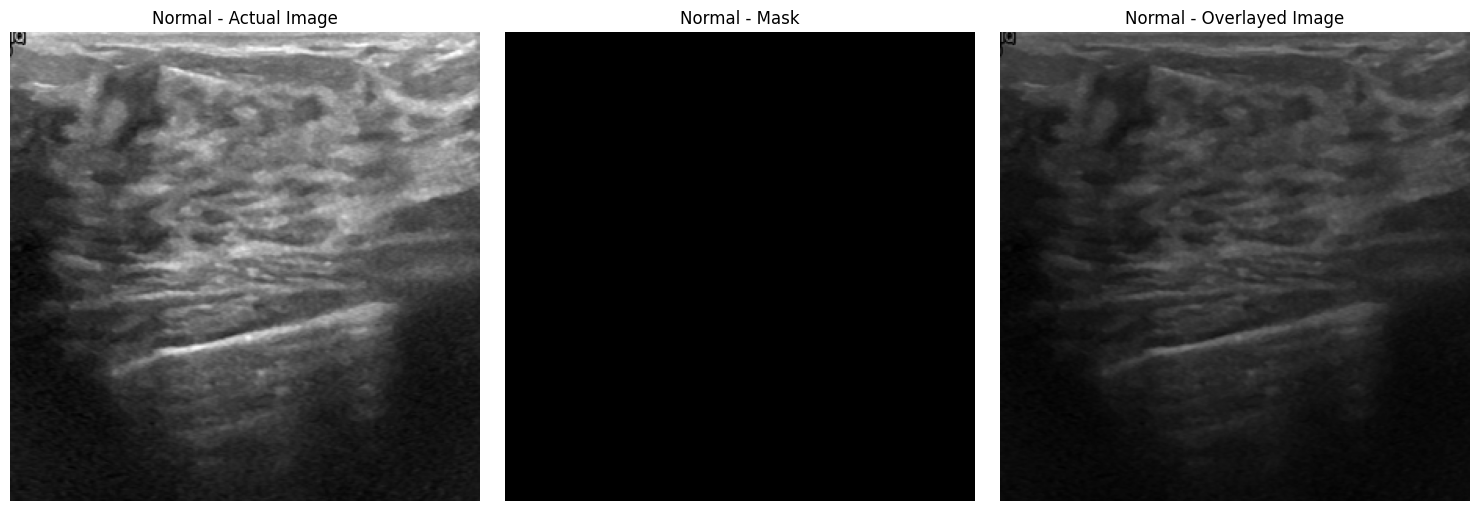

In [ ]:
# Define the directory paths
input_dir = '/content/drive/MyDrive/Dataset_BUSI_with_GT'  # Update the path based on your Colab environment
overlayed_dir = '/content/OverlayedImages/normal'  # Update the path based on your Colab environment

# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for display
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'normal (1).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'normal', image_filename)
mask_image_path = os.path.join(input_dir, 'normal', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)

# Check if the overlayed image exists before attempting to load it
if os.path.exists(overlayed_image_path):
    overlayed_image = Image.open(overlayed_image_path)

    # Resize the images
    overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.ANTIALIAS)

    # Display the overlayed image
    axs[2].imshow(overlayed_image)
    axs[2].set_title('Normal - Overlayed Image')
    axs[2].axis('off')
else:
    axs[2].axis('off')
    axs[2].text(0.5, 0.5, 'Overlayed image not found', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

# Resize the actual image and mask
actual_image = actual_image.resize((desired_width, desired_height), Image.ANTIALIAS)
mask_image = mask_image.resize((desired_width, desired_height), Image.ANTIALIAS)

# Display the actual and mask images
axs[0].imshow(actual_image)
axs[0].set_title('Normal - Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('Normal - Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Transformation and Augmentation - Using the same function, again giving more weight to the minority classes

# Define the minority classes in your dataset
class_names = ['malignant', 'normal','benign']
minority_classes = ['malignant', 'normal']

# Define custom data transformations for minority classes
minority_class_transforms = transforms.Compose([
    RandomHorizontalFlip(p=0.9),  # Apply with 90% probability
    RandomRotation(15, expand=False, center=None),
    ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

# Define data transformations for train, validation, and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        # Apply custom augmentations to minority classes
        transforms.RandomApply([minority_class_transforms], p=0.5) if any(cls in minority_classes for cls in class_names) else transforms.RandomApply([], p=0.0),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
#Create train/test validation folders and data split
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the path to your input folder
data_dir = '/content/OverlayedImages'  # Modify this path based on your Colab environment

# Create a list to store file paths and labels
file_paths = []
labels = []

# Loop through the subdirectories (benign, malignant, normal)
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            if image_file.endswith('.png') and not (image_file.endswith('_mask.png') or
                                                     image_file.endswith('_mask_1.png') or
                                                     image_file.endswith('_mask_2.png')):
                image_path = os.path.join(label_dir, image_file)
                labels.append(label)
                file_paths.append(image_path)

# Create a DataFrame to store the file paths and labels
data = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42, stratify=train_data['Label'])

# Define the paths for the train, validation, and test directories
train_dir = '/content/train'  # Modify this path based on your Colab environment
val_dir = '/content/validation'  # Modify this path based on your Colab environment
test_dir = '/content/test'  # Modify this path based on your Colab environment

# Create the train, validation, and test directories and subdirectories
for label in labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy the images to the corresponding directories
for _, row in train_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(train_dir, label))

for _, row in val_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(val_dir, label))

for _, row in test_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(test_dir, label))


In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the path to your input folder (overlayed images)
data_dir = '/content/OverlayedImages'  # Modify this path based on your Colab environment

# Create a list to store file paths and labels
file_paths = []
labels = []

# Loop through the subdirectories (benign, malignant, normal)
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            if image_file.endswith('.png') and not (image_file.endswith('_mask.png') or
                                                     image_file.endswith('_mask_1.png') or
                                                     image_file.endswith('_mask_2.png')):
                image_path = os.path.join(label_dir, image_file)
                labels.append(label)
                file_paths.append(image_path)

# Create a DataFrame to store the file paths and labels
data = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42, stratify=train_data['Label'])

# Define the paths for the train, validation, and test directories
train_dir = '/content/train'  # Modify this path based on your Colab environment
val_dir = '/content/validation'  # Modify this path based on your Colab environment
test_dir = '/content/test'  # Modify this path based on your Colab environment

# Create the train, validation, and test directories and subdirectories
for label in labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy the images to the corresponding directories for train set
for _, row in train_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(train_dir, label))

# Copy the images to the corresponding directories for validation set
for _, row in val_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(val_dir, label))

# Copy the images to the corresponding directories for test set
for _, row in test_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(test_dir, label))

# Display file counts for each set and category
def display_file_counts(directory, set_name):
    subdirectories = ['benign', 'malignant', 'normal']
    file_counts = {}

    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        if os.path.exists(subdirectory_path):
            file_count = len(os.listdir(subdirectory_path))
            file_counts[subdirectory] = file_count

    print(f"{set_name} Set File Counts:")
    for category, count in file_counts.items():
        print(f"{set_name} {category}: {count}")

# Display file counts for each set
display_file_counts(train_dir, "Train")
display_file_counts(val_dir, "Validation")
display_file_counts(test_dir, "Test")


Train Set File Counts:
Train benign: 315
Train malignant: 152
Train normal: 96
Validation Set File Counts:
Validation benign: 56
Validation malignant: 27
Validation normal: 17
Test Set File Counts:
Test benign: 66
Test malignant: 31
Test normal: 20


In [ ]:
#Apply transformation and augmentation

# Specify the correct data directory
data_dir = '/content'

# Create datasets for train, validation, and test
image_datasets = {
    x: ImageFolder(
        root=os.path.join(data_dir, x),
        transform=data_transforms[x]
    )
    for x in ['train', 'validation', 'test']
}

# Specify batch size for dataloaders
batch_size = 8  # You can adjust this based on your hardware and preferences

# Create dataloaders for train, validation, and test
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
               for x in ['train', 'validation', 'test']}

# Calculate dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'validation', 'test']}

# Get class labels
class_names = image_datasets['train'].classes

# Print dataset sizes and class labels
print("Dataset Sizes:", dataset_sizes)
print("Class Labels:", class_names)

Dataset Sizes: {'train': 563, 'validation': 100, 'test': 117}
Class Labels: ['benign', 'malignant', 'normal']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#Transfer Learning by fineTuning the pretrained Resnet101 Model
#Load Resnet101 pretained Model
#Resnet101 = models.resnet101(pretrained=True)
#If pretained is not working, you can also use weights instead.
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Resnet101 = models.resnet101(weights=True)

print(Resnet101)
#Set the resnet param.requires_grad = True to calculate the gradient,
#so that model fine-tunes the weights of the pretrained network
#by continuing the backpropagation.
for param in Resnet101.parameters():
    param.requires_grad = True

#Get the number of Input features of Resnet last fully connected layer
#because we are going to replace it with new fully connected layer.
in_features = Resnet101.fc.in_features

#Reset the final fully connected layer of the of the pre-trained Resnet.
Resnet101.fc = nn.Linear(in_features, len(class_names))

Resnet_fineTuning = Resnet101.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 159MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Define the training function with early stopping and additional features
def train_model_with_early_stopping(model, lossFunction, optimizer, scheduler, dataloaders, dataset_sizes, class_names, device, num_epochs=20, patience=2):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')  # Initialize best_loss with a large value
    consecutive_epochs_without_improvement = 0

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = lossFunction(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Append training loss here
                if phase == 'train':
                    train_losses.append(loss.item())  # Append training loss
                else:
                    val_losses.append(loss.item())  # Append validation loss

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Early stopping: Check if validation loss improved
            if phase == 'validation':
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    consecutive_epochs_without_improvement = 0
                else:
                    consecutive_epochs_without_improvement += 1


                val_losses.append(epoch_loss)

        # Check if early stopping criteria are met
        if consecutive_epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch} epochs")
            break

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Loss: {:.4f}'.format(best_loss))

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Calculate classification report and confusion matrix for validation data
    y_true = []
    y_pred = []

    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        for inputs, labels in dataloaders['validation']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Generate classification report
    target_names = [str(class_names[i]) for i in range(len(class_names))]
    print(classification_report(y_true, y_pred, target_names=target_names))

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    return model

In [ ]:
#Define optimzation algorithm
optimizer = optim.Adam(Resnet_fineTuning.parameters(), lr=0.00005)

# Decay LR by a factor of 0.1 every 7 epochs
Decay_Learning_Rate = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

#Define loss functions
Loss_Function = nn.CrossEntropyLoss()

In [ ]:
# Assuming your Colab working directory is '/content'
save_dir = '/content/'

# Fine-tuning the model
model_fineTuning = train_model_with_early_stopping(
    Resnet_fineTuning, Loss_Function, optimizer, Decay_Learning_Rate,
    dataloaders, dataset_sizes, class_names, device, num_epochs=20, patience=2
)

# Save the model in the Colab working directory
torch.save(model_fineTuning, os.path.join(save_dir, 'Resnet_fineTuning.pth'))


Epoch 0/19
----------
train Loss: 0.3840 Acc: 0.8774
validation Loss: 0.1848 Acc: 0.9500

Epoch 1/19
----------
train Loss: 0.1119 Acc: 0.9787
validation Loss: 0.1384 Acc: 0.9700

Epoch 2/19
----------
train Loss: 0.1172 Acc: 0.9645
validation Loss: 0.0625 Acc: 0.9900

Epoch 3/19
----------
train Loss: 0.0969 Acc: 0.9769
validation Loss: 0.0742 Acc: 0.9800

Epoch 4/19
----------
train Loss: 0.0561 Acc: 0.9805
validation Loss: 0.0844 Acc: 0.9800
Early stopping after 4 epochs
Training complete in 1m 24s
Best val Loss: 0.0625
              precision    recall  f1-score   support

      benign       0.98      1.00      0.99        56
   malignant       1.00      0.96      0.98        27
      normal       1.00      1.00      1.00        17

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[56  0  0]
 [ 1 26  0]
 [ 0  0 17]]


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


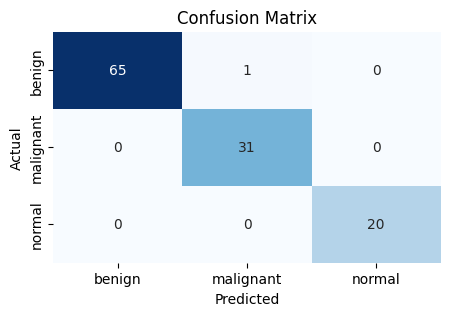

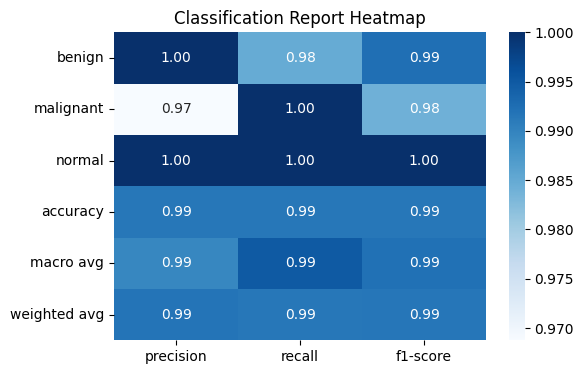

Simplified Classification Report:
             benign  malignant  normal  accuracy  macro avg  weighted avg
precision  1.000000   0.968750     1.0  0.991453   0.989583      0.991720
recall     0.984848   1.000000     1.0  0.991453   0.994949      0.991453
f1-score   0.992366   0.984127     1.0  0.991453   0.992164      0.991488


In [ ]:
# Define label names
label_names = [str(class_names[i]) for i in range(len(class_names))]

# Calculate classification report and confusion matrix on unseen test data
y_true = []
y_pred = []

model_fineTuning.eval()  # Set model to evaluation mode

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_fineTuning(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Generate classification report
classification_rep = classification_report(y_true, y_pred, target_names=label_names, output_dict=True)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with label names
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert the classification report to a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')  # Simplify classification report
plt.title('Classification Report Heatmap')
plt.show()

# Print the simplified classification report
print("Simplified Classification Report:")
print(pd.DataFrame(classification_rep).iloc[:-1, :])  # Display without support and avg/total rows